## Data Prep

**Import necessary modules and the ASOS/SNOTEL dataframes**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dtb
import os
from glob import glob
import datetime as dt
import seaborn as sns
pd.show_versions()
import sys
import graphviz
sys.executable
#import graphviz


INSTALLED VERSIONS
------------------
commit: None
python: 3.6.5.final.0
python-bits: 32
OS: Windows
OS-release: 10
machine: AMD64
processor: Intel64 Family 6 Model 142 Stepping 9, GenuineIntel
byteorder: little
LC_ALL: None
LANG: en_US.UTF-8
LOCALE: None.None

pandas: 0.24.0
pytest: None
pip: 18.1
setuptools: 39.0.1
Cython: None
numpy: 1.14.3
scipy: 1.1.0
pyarrow: None
xarray: None
IPython: 6.4.0
sphinx: None
patsy: 0.5.1
dateutil: 2.7.3
pytz: 2018.4
blosc: None
bottleneck: None
tables: None
numexpr: None
feather: None
matplotlib: 2.2.2
openpyxl: None
xlrd: None
xlwt: None
xlsxwriter: None
lxml.etree: 4.2.5
bs4: None
html5lib: 1.0.1
sqlalchemy: None
pymysql: None
psycopg2: None
jinja2: 2.10
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None
gcsfs: None


'c:\\users\\rapp\\appdata\\local\\programs\\python\\python36-32\\python.exe'

In [2]:
data = [pd.read_csv('asos_snotel_UA_12hr_df.dat', parse_dates = True, index_col = 'Date_Time')]
asos_snotel_UA_df = pd.concat(data)
#asos_snotel_UA_df['LXV_WindSpeed_m/s']

#asos_snotel_UA_df.rename(columns={'LXV_WindSpeed_m/s': 'LXV_WindSpeed_mps'}, inplace=True)

asos_snotel_UA_df.astype('float16')
pd.set_option('display.expand_frame_repr', True)


print(asos_snotel_UA_df.keys())




#delete empty columns as they mess up loops
#del asos_snotel_UA_df['CMtn_6hr_Precipitation_mm']            #empty column


Index(['CMtnSNTL_Temp_degC', 'CMtnSNTL_SnowDepth_in', 'CMtn_Temperature_degC',
       'CMtn_Dewpoint_degC', 'CMtn_WindDirection_deg', 'CMtn_WindSpeed_mps',
       'CMtn_CloudCover_oktas', 'CMtn_1hr_Precipitation_mm',
       'LXV_Temperature_degC', 'LXV_Dewpoint_degC',
       ...
       'KGJT_d300_200_height_m', 'KGJT_d300_200_tmpc', 'KGJT_d300_200_dwpc',
       'KGJT_d300_200_drct', 'KGJT_d300_200_speed_kts',
       'KGJT_d250_200_height_m', 'KGJT_d250_200_tmpc', 'KGJT_d250_200_dwpc',
       'KGJT_d250_200_drct', 'KGJT_d250_200_speed_kts'],
      dtype='object', length=163)


It is important to keep in mind that 'CMtnSNTL_12hr_SNWD_in contains snow depth info taken at the start of the respective 12hr period timestamp.  The snowfall calculated also gives the snowfall that fell in the 12hrs after the timestamp.  The OLS model will utilize hourly meteorological measurements at exactly 00:00 and 12:00 hours to predict the amount of snow which will fall in the next 12 hour period.  For example, the 00:00 meteorological measurements will be used to predict the snow which fell between 00:00 and 12:00.

# Now try Cross Validation using Timeseries split

In [3]:
num_folds = 5 
Kfold_feat = [0 for i in range(num_folds)]

Kfold_feat[0] = ['KGJT_d700_200_speed_kts', 'KGJT_d700_250_dwpc', 'KGJT_d400_300_height_m', 'KGJT_d500_300_speed_kts', 'KGJT_d300_250_tmpc', 'KGJT_d700_250_height_m', \
                'KGJT_300mb_speed_kts', 'KGJT_d700_200_tmpc', 'CMtn_WindSpeed_mps', 'KGJT_d500_300_height_m', 'KGJT_500mb_speed_kts', 'CMtn_Dewpoint_degC', 'KGJT_d500_400_height_m']

Kfold_feat[1] = ['KGJT_d700_400_tmpc', 'KGJT_d300_200_tmpc', 'KGJT_d300_250_tmpc', 'KGJT_d500_400_tmpc', 'KGJT_d400_300_height_m', 'KGJT_d300_200_speed_kts', \
                'KGJT_d700_250_height_m',  'KGJT_d250_200_tmpc', 'CMtn_WindSpeed_mps', 'KGJT_700mb_speed_kts', 'KGJT_d700_500_tmpc', 'CMtn_Dewpoint_degC']

Kfold_feat[2] = ['KGJT_500mb_height_m', 'LXV_Pressure_hp', 'KGJT_d500_300_dwpc', 'KGJT_d300_200_dwpc', 'KGJT_300mb_dwpc', 'KGJT_d700_300_height_m', 'KGJT_d700_400_height_m',\
                 'KGJT_d700_250_height_m', 'KGJT_d400_200_height_m', 'KGJT_700mb_tmpc', 'KGJT_500mb_dwpc', 'KGJT_d400_250_height_m', 'KGJT_d250_200_height_m', 'KGJT_d500_200_speed_kts', \
                 'KGJT_200mb_dwpc', 'KGJT_d300_200_height_m', 'KGJT_500mb_tmpc', 'KGJT_d700_200_height_m', 'KGJT_d400_300_height_m', 'CMtn_WindDirection_deg', 'KGJT_d300_250_height_m', \
                 'KGJT_d250_200_tmpc', 'KGJT_700mb_speed_kts', 'KGJT_d300_250_tmpc', 'KGJT_d500_200_dwpc', 'CMtn_WindSpeed_mps', 'KGJT_d700_250_dwpc', 'KGJT_d700_400_speed_kts', 'KGJT_d300_200_tmpc', 'LXV_Temperature_degC', 'KGJT_d700_500_tmpc', \
                 'KGJT_400mb_speed_kts', 'CMtn_Dewpoint_degC']

Kfold_feat[3] = ['CMtn_WindSpeed_mps', 'KGJT_d300_200_dwpc', 'LXV_WindSpeed_mps', 'KGJT_d400_300_height_m', \
                 'KGJT_d300_250_tmpc', 'KGJT_d300_250_dwpc', 'KGJT_d700_200_speed_kts', 'LXV_WindDirection_deg', 'KGJT_d700_400_tmpc', 'LXV_Temperature_degC', \
                 'KGJT_200mb_tmpc', 'CMtn_WindDirection_deg',  'KGJT_400mb_dwpc', 'KGJT_250mb_speed_kts', 'CMtn_Dewpoint_degC']

Kfold_feat[4] = ['KGJT_d400_300_tmpc', 'KGJT_d500_200_tmpc', 'KGJT_200mb_tmpc', 'KGJT_d500_300_tmpc', 'KGJT_d700_400_tmpc', 'KGJT_d700_200_tmpc', 'KGJT_d500_250_tmpc', 'KGJT_700mb_tmpc', 'LXV_12hr_delta_Pressure_hp', 'KGJT_d700_300_tmpc', \
                 'KGJT_d700_500_tmpc', 'KGJT_d700_400_dwpc', 'KGJT_400mb_tmpc', 'KGJT_d500_400_tmpc', 'KGJT_d850_250_height_m', 'KGJT_500mb_tmpc', 'KGJT_d700_300_height_m', 'CMtn_WindDirection_deg', 'KGJT_d300_250_tmpc', 'KGJT_d500_250_dwpc', \
                  'KGJT_d250_200_tmpc', 'KGJT_d250_200_speed_kts', 'KGJT_d500_200_dwpc', 'LXV_Dewpoint_degC', 'CMtn_Dewpoint_degC',  'KGJT_700mb_speed_kts', \
                 'KGJT_d300_200_tmpc', 'KGJT_d250_200_dwpc', 'KGJT_d500_400_height_m']

print(Kfold_feat)
                 
print(asos_snotel_UA_df['2006':'2017'][['KGJT_d400_300_tmpc', 'KGJT_d500_200_tmpc']].apply(lambda x: x.tolist(), axis=1))

[['KGJT_d700_200_speed_kts', 'KGJT_d700_250_dwpc', 'KGJT_d400_300_height_m', 'KGJT_d500_300_speed_kts', 'KGJT_d300_250_tmpc', 'KGJT_d700_250_height_m', 'KGJT_300mb_speed_kts', 'KGJT_d700_200_tmpc', 'CMtn_WindSpeed_mps', 'KGJT_d500_300_height_m', 'KGJT_500mb_speed_kts', 'CMtn_Dewpoint_degC', 'KGJT_d500_400_height_m'], ['KGJT_d700_400_tmpc', 'KGJT_d300_200_tmpc', 'KGJT_d300_250_tmpc', 'KGJT_d500_400_tmpc', 'KGJT_d400_300_height_m', 'KGJT_d300_200_speed_kts', 'KGJT_d700_250_height_m', 'KGJT_d250_200_tmpc', 'CMtn_WindSpeed_mps', 'KGJT_700mb_speed_kts', 'KGJT_d700_500_tmpc', 'CMtn_Dewpoint_degC'], ['KGJT_500mb_height_m', 'LXV_Pressure_hp', 'KGJT_d500_300_dwpc', 'KGJT_d300_200_dwpc', 'KGJT_300mb_dwpc', 'KGJT_d700_300_height_m', 'KGJT_d700_400_height_m', 'KGJT_d700_250_height_m', 'KGJT_d400_200_height_m', 'KGJT_700mb_tmpc', 'KGJT_500mb_dwpc', 'KGJT_d400_250_height_m', 'KGJT_d250_200_height_m', 'KGJT_d500_200_speed_kts', 'KGJT_200mb_dwpc', 'KGJT_d300_200_height_m', 'KGJT_500mb_tmpc', 'KGJT_d70

In [4]:
#Recall from 8a that the "good" features were determined:
good_vars_UASFC = ['CMtnSNTL_Temp_degC', 'CMtn_Temperature_degC', 'CMtn_Dewpoint_degC', 'CMtn_WindDirection_deg', 'CMtn_WindSpeed_mps', 'LXV_Temperature_degC', 'LXV_Dewpoint_degC', 'LXV_Pressure_hp', \
                   'LXV_WindSpeed_mps', 'LXV_WindDirection_deg', 'LXV_12hr_delta_Pressure_hp', 'KGJT_200mb_height_m', 'KGJT_200mb_tmpc', 'KGJT_200mb_dwpc', 'KGJT_200mb_drct', 'KGJT_200mb_speed_kts', \
                   'KGJT_250mb_height_m', 'KGJT_250mb_tmpc', 'KGJT_250mb_dwpc', 'KGJT_250mb_drct', 'KGJT_250mb_speed_kts', 'KGJT_300mb_height_m', 'KGJT_300mb_tmpc', 'KGJT_300mb_dwpc', 'KGJT_300mb_drct', \
                   'KGJT_300mb_speed_kts', 'KGJT_400mb_height_m', 'KGJT_400mb_tmpc', 'KGJT_400mb_dwpc', 'KGJT_400mb_drct', 'KGJT_400mb_speed_kts', 'KGJT_500mb_height_m', 'KGJT_500mb_tmpc', 'KGJT_500mb_dwpc', \
                   'KGJT_500mb_drct', 'KGJT_500mb_speed_kts', 'KGJT_700mb_height_m', 'KGJT_700mb_tmpc', 'KGJT_700mb_dwpc', 'KGJT_700mb_drct', 'KGJT_700mb_speed_kts', 'KGJT_850mb_height_m', 'KGJT_d850_700_height_m', 
                   'KGJT_d850_500_height_m', 'KGJT_d850_400_height_m', 'KGJT_d850_300_height_m', 'KGJT_d850_250_height_m', 'KGJT_d850_200_height_m', 'KGJT_d700_500_height_m', 'KGJT_d700_500_tmpc', 'KGJT_d700_500_dwpc',\
                   'KGJT_d700_500_drct', 'KGJT_d700_500_speed_kts', 'KGJT_d700_400_height_m', 'KGJT_d700_400_tmpc', 'KGJT_d700_400_dwpc', 'KGJT_d700_400_drct', 'KGJT_d700_400_speed_kts', 'KGJT_d700_300_height_m',\
                   'KGJT_d700_300_tmpc', 'KGJT_d700_300_dwpc', 'KGJT_d700_300_drct', 'KGJT_d700_300_speed_kts', 'KGJT_d700_250_height_m', 'KGJT_d700_250_tmpc', 'KGJT_d700_250_dwpc', 'KGJT_d700_250_drct', \
                   'KGJT_d700_250_speed_kts', 'KGJT_d700_200_height_m', 'KGJT_d700_200_tmpc', 'KGJT_d700_200_dwpc', 'KGJT_d700_200_drct', 'KGJT_d700_200_speed_kts', 'KGJT_d500_400_height_m', 'KGJT_d500_400_tmpc', \
                   'KGJT_d500_400_dwpc', 'KGJT_d500_400_drct', 'KGJT_d500_400_speed_kts', 'KGJT_d500_300_height_m', 'KGJT_d500_300_tmpc', 'KGJT_d500_300_dwpc', 'KGJT_d500_300_drct', 'KGJT_d500_300_speed_kts', \
                   'KGJT_d500_250_height_m', 'KGJT_d500_250_tmpc', 'KGJT_d500_250_dwpc', 'KGJT_d500_250_drct', 'KGJT_d500_250_speed_kts', 'KGJT_d500_200_height_m', 'KGJT_d500_200_tmpc', 'KGJT_d500_200_dwpc', \
                   'KGJT_d500_200_drct', 'KGJT_d500_200_speed_kts', 'KGJT_d400_300_height_m', 'KGJT_d400_300_tmpc', 'KGJT_d400_300_dwpc', 'KGJT_d400_300_drct', 'KGJT_d400_300_speed_kts', 'KGJT_d400_250_height_m', \
                   'KGJT_d400_250_tmpc', 'KGJT_d400_250_dwpc', 'KGJT_d400_250_drct', 'KGJT_d400_250_speed_kts', 'KGJT_d400_200_height_m', 'KGJT_d400_200_tmpc', 'KGJT_d400_200_dwpc', 'KGJT_d400_200_drct', \
                   'KGJT_d400_200_speed_kts', 'KGJT_d300_250_height_m', 'KGJT_d300_250_tmpc', 'KGJT_d300_250_dwpc', 'KGJT_d300_250_drct', 'KGJT_d300_250_speed_kts', 'KGJT_d300_200_height_m', 'KGJT_d300_200_tmpc',\
                   'KGJT_d300_200_dwpc', 'KGJT_d300_200_drct', 'KGJT_d300_200_speed_kts', 'KGJT_d250_200_height_m', 'KGJT_d250_200_tmpc', 'KGJT_d250_200_dwpc', 'KGJT_d250_200_drct', 'KGJT_d250_200_speed_kts']



X_feat_UASFC = []

Y_temp, Y_actsnf_SFC, Y_actsnf_UASFC = [], [], []
X_temp, idx_SFC, idx_UASFC = [],[], []



################################################
#UA and Surface features(X) and corresponding snowfall
idx_UASFC = np.isfinite(asos_snotel_UA_df['2006':'2017']['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'])
for v in good_vars_UASFC:
    idx_UASFC = idx_UASFC  & np.isfinite(asos_snotel_UA_df['2006':'2017'][v])
#    print(v)

Y_temp= round(asos_snotel_UA_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']['2006':'2017'][idx_UASFC],0)
Y_actsnf_UASFC  = Y_temp.tolist()

for fold_feat in Kfold_feat:
#  print(fold_feat)
  X_temp = asos_snotel_UA_df['2006':'2017'][good_vars_UASFC][idx_UASFC][fold_feat].apply(lambda x: x.tolist(), axis=1)
  X_feat_UASFC.append(X_temp.tolist())

print(X_feat_UASFC[0], Y_actsnf_UASFC[0])
print(np.mean(Y_actsnf_UASFC))   #check to make sure means are equivalent


[[1.0, 43.7, -1950.0, -1.0, -1.0, -7339.0, 25.0, 40.4, 5.1, -3560.0, 24.0, -8.0, -1610.0], [-35.0, 60.5, -1970.0, -31.0, 4.8, -7279.0, 70.0, 45.4, 7.7, -3550.0, 39.0, -12.0, -1580.0], [-52.0, 49.2, -1970.0, -15.0, 8.6, -7344.0, 50.0, 57.6, 7.7, -3590.0, 35.0, -12.0, -1620.0], [-46.0, 42.2, -1960.0, -24.0, 10.0, -7292.0, 74.0, 51.4, 2.6, -3570.0, 50.0, -17.0, -1610.0], [-45.0, 61.1, -1970.0, -29.0, 6.8, -7356.0, 83.0, 51.4, 10.8, -3590.0, 54.0, -10.0, -1620.0], [-43.0, 44.8, -1980.0, -20.0, 11.2, -7342.0, 55.0, 43.0, 7.7, -3600.0, 35.0, -18.0, -1620.0], [-21.0, 53.3, -1940.0, -9.0, 2.2, -7279.0, 46.0, 47.6, 9.3, -3530.0, 37.0, -9.0, -1590.0], [-43.0, 62.1, -1950.0, -8.0, 5.8, -7295.0, 42.0, 49.4, 1.5, -3550.0, 34.0, -6.0, -1600.0], [-3.0, 57.2, -1970.0, -38.0, 4.4, -7322.0, 77.0, 42.2, 8.8, -3570.0, 39.0, -12.0, -1600.0], [-20.0, 55.8, -2000.0, -38.0, 5.0, -7449.0, 54.0, 49.4, 4.1, -3640.0, 16.0, -3.0, -1640.0], [-68.0, 56.3, -2010.0, -47.0, 4.8, -7466.0, 86.0, 56.7, 4.1, -3650.0, 39.0,

In [5]:
from sklearn.model_selection import TimeSeriesSplit # import KFold
from sklearn.model_selection import KFold # import KFold
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict
lm = linear_model.LinearRegression()

from scipy.stats import pearsonr, linregress
from sklearn.metrics import mean_squared_error
from sklearn import metrics


tscv = KFold(n_splits=5)
print(tscv)  
print(len(X_feat_UASFC[0]))
print(len(Y_actsnf_UASFC))
for train_index, test_index in tscv.split(X_feat_UASFC[0]):
  print("TRAIN:", train_index, "TEST:", test_index)


KFold(n_splits=5, random_state=None, shuffle=False)
213
213
TRAIN: [ 43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23

******
Fold0: -1.8901039812359763
******
Fold1: -1.9496744349023107
******
Fold2: -0.24018775184846528
******
Fold3: -1.0747511363085085
******
Fold4: -0.4770141266658099


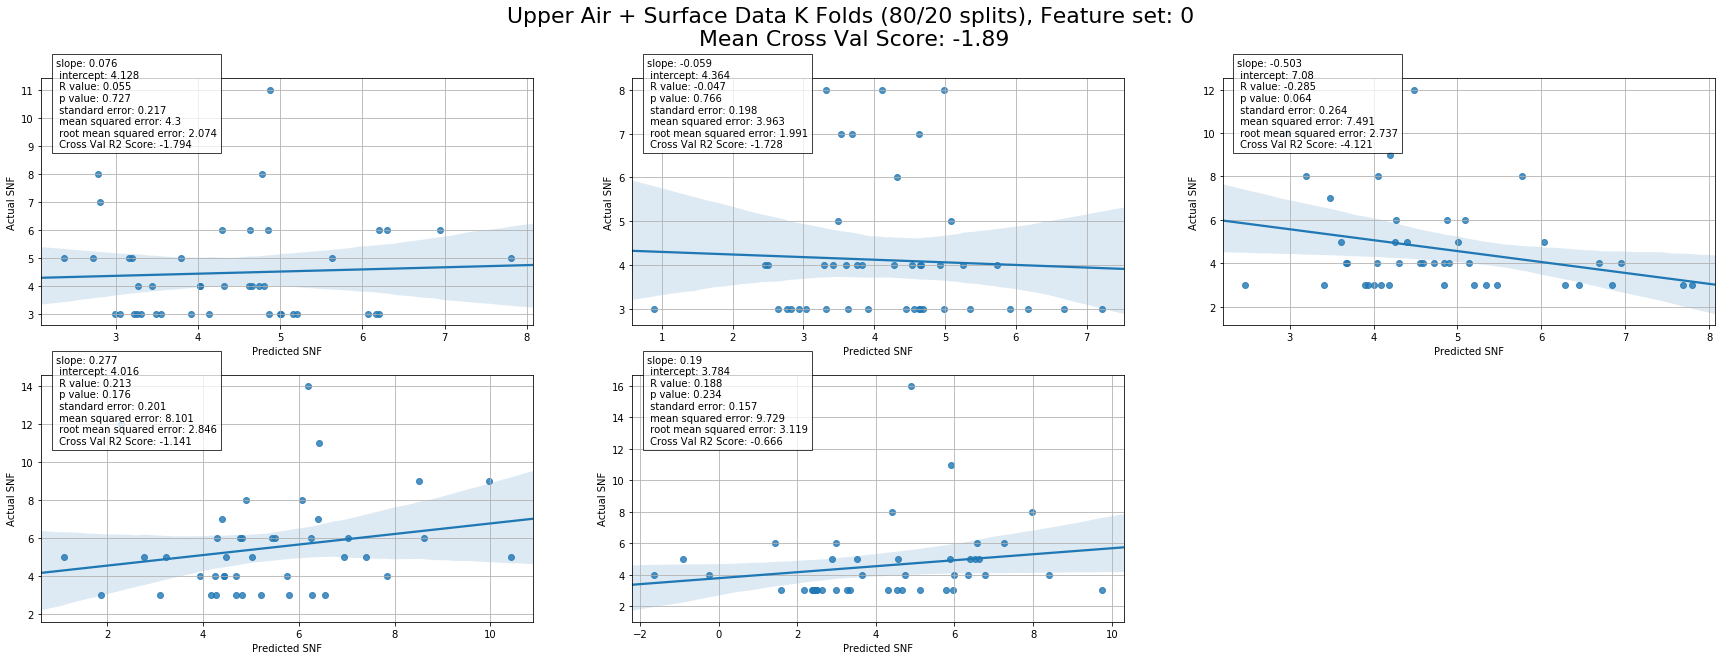

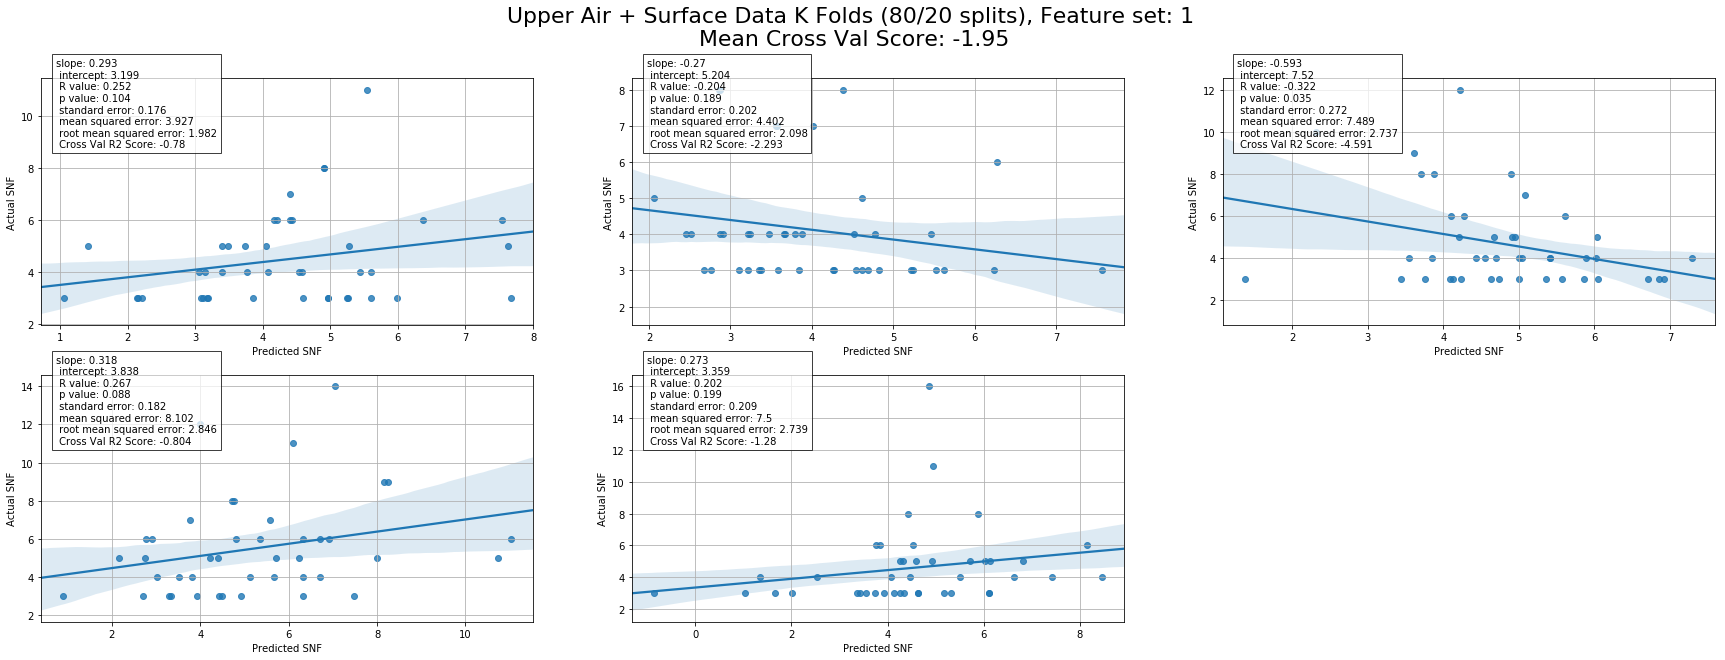

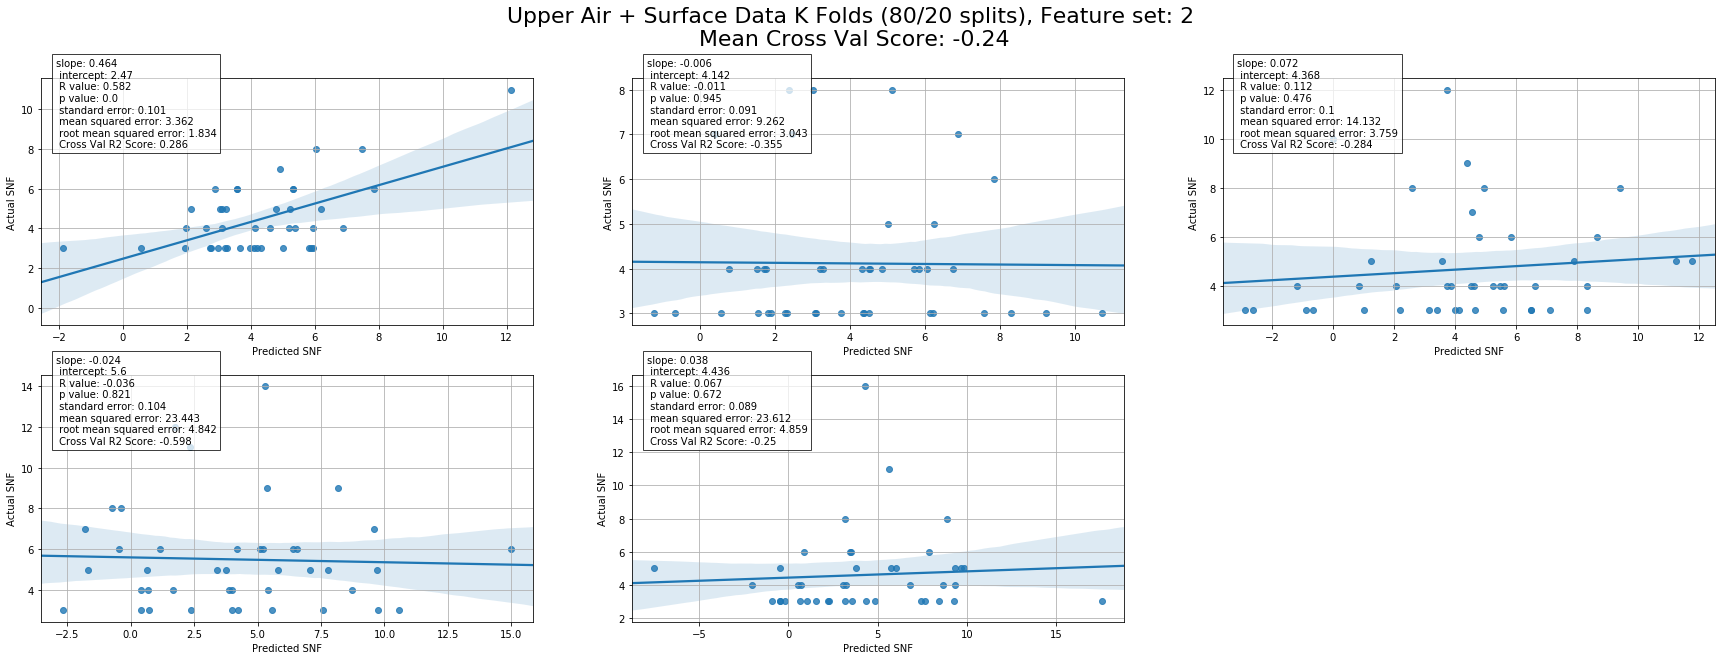

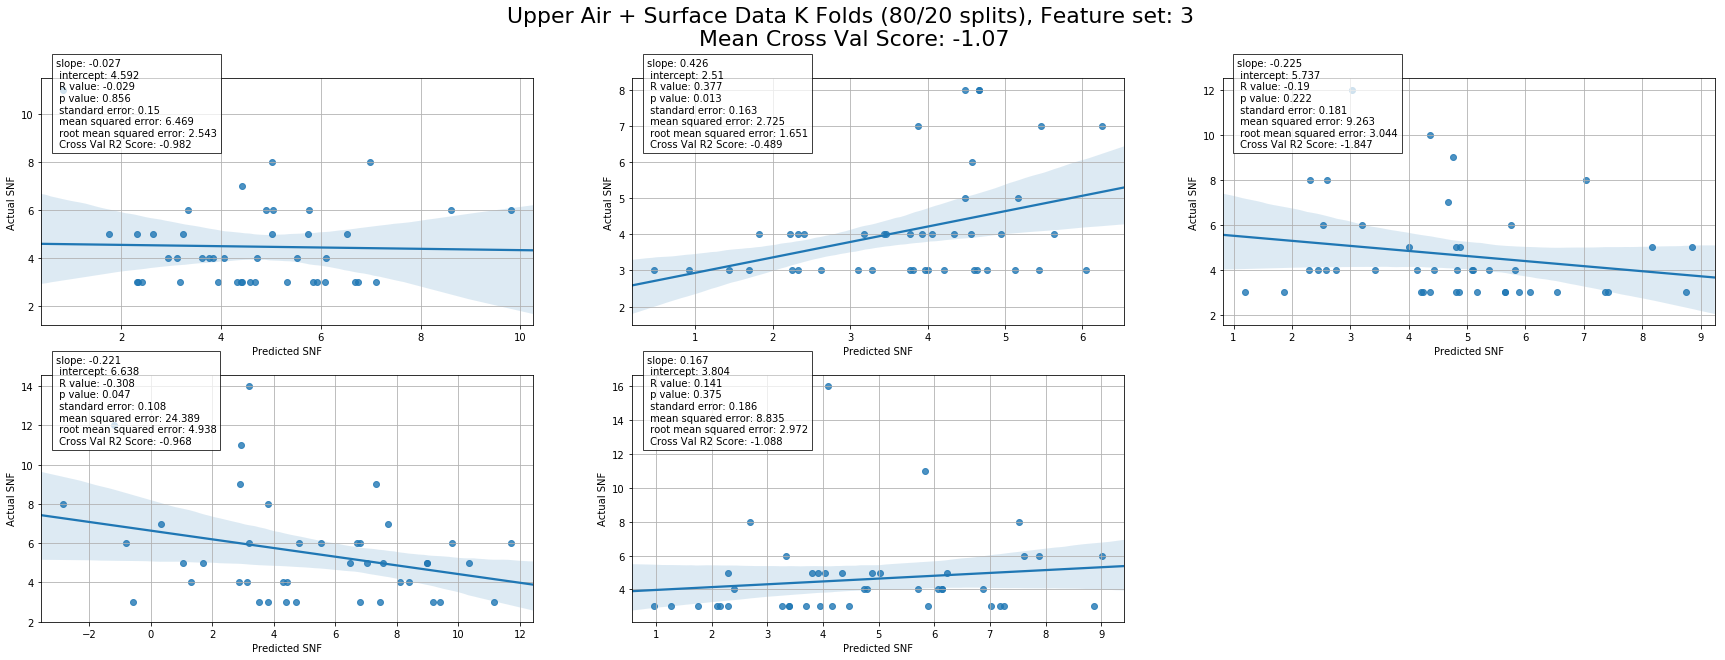

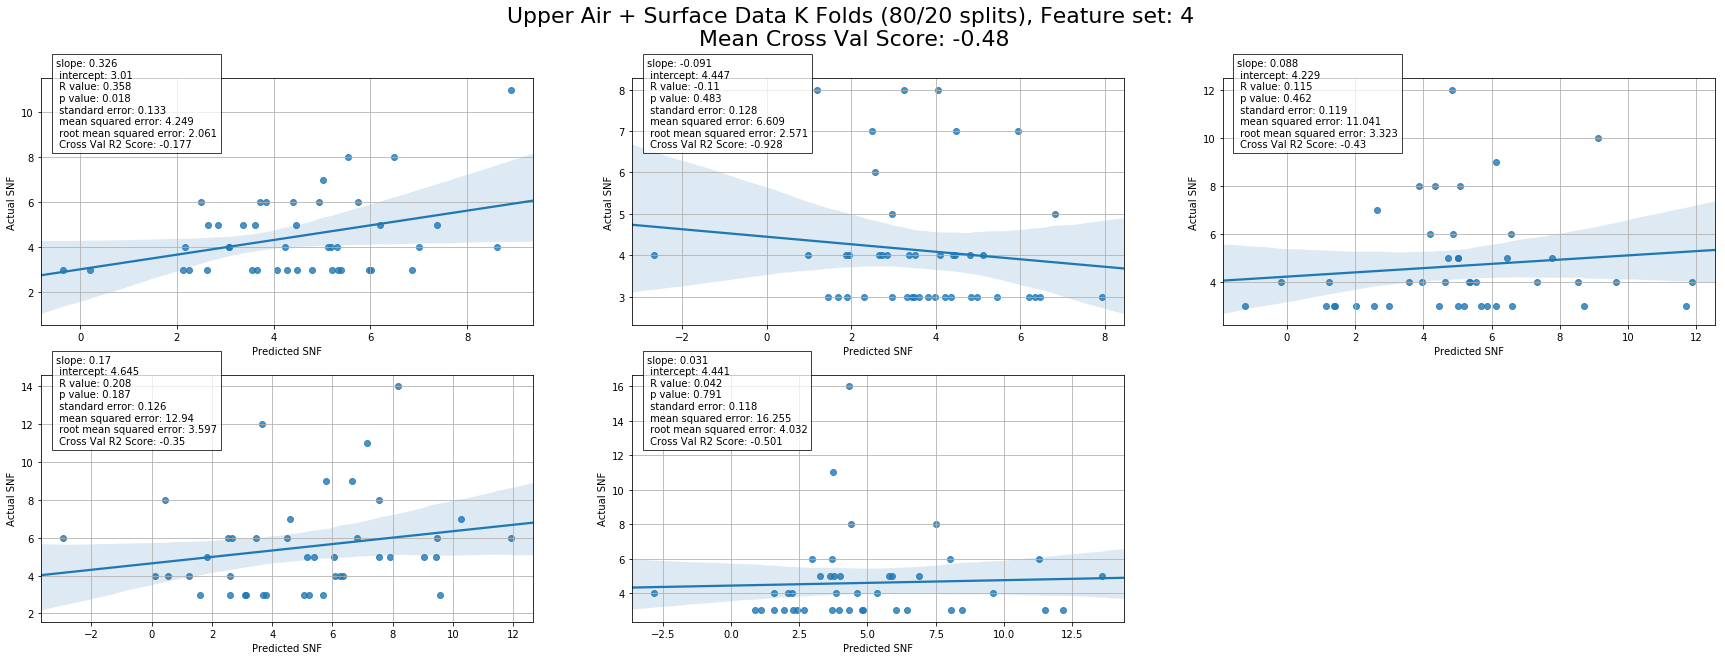

In [6]:
import statsmodels.api as sm
#import statsmodel
from statsmodels.formula.api import ols
from collections import OrderedDict


for fold in np.arange(0, len(Kfold_feat),1):
  
 slopes_UASFC, intercepts_UASFC, r_values_UASFC, p_values_UASFC, std_errs_UASFC,  rmse_UASFC = [],[],[],[],[], [] 
 R2_scores_UASFC =[]
 all_Ytest_predictions_UASFC, all_Ytests_UASFC = [], []
 all_Ytest_predictions_arrays_UASFC, all_Ytests_arrays_UASFC = [],[]
 X_train = np.array([])
 
 print('******')


 all_Ytest_predictions_UASFC, all_Ytests_UASFC = [], []
 all_Ytest_predictions_arrays_UASFC, all_Ytests_arrays_UASFC = [],[]

 count = 0
 fig = plt.figure(figsize=(30,10))
 for train_index, test_index in tscv.split(X_feat_UASFC[fold]):
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train =  np.array(X_feat_UASFC[fold])[train_index]
  X_test =  np.array(X_feat_UASFC[fold])[test_index]
  Y_train =  np.array(Y_actsnf_UASFC)[train_index]
  Y_test =   np.array(Y_actsnf_UASFC)[test_index]
   
    
  model = lm.fit(X_train, Y_train)
  #Y_predsnf = lm.predict(X_test)
  Ytest_predictions = cross_val_predict(model, X_test, Y_test, cv = 5)
  R2_score = metrics.r2_score(Ytest_predictions, Y_test)
  mse = mean_squared_error(Ytest_predictions, Y_test)
  R2_scores_UASFC.append(metrics.r2_score(Ytest_predictions, Y_test))
 
    

  ax = plt.subplot(2,3,count+1)
  ax.set_xlabel('Predicted SNF', fontsize = 10)
  ax.set_ylabel('Actual SNF', fontsize = 10)

  slope, intercept, r_value, p_value, std_err = linregress(Ytest_predictions, Y_test)  
  sns.regplot(Ytest_predictions, Y_test)
  bbox_props=dict(facecolor='red', alpha=0.75, fc = 'white')
  plt.annotate('slope: ' + str(round(slope,3)) +
                 '\n intercept: ' + str(round(intercept,3)) + 
                 '\n R value: ' + str(round(r_value,3)) +  
                 '\n p value: ' + str(round(p_value,3)) + 
                 '\n standard error: ' + str(round(std_err,3)) +
                 '\n mean squared error: ' + str(round(mse,3)) +
                 '\n root mean squared error: ' + str(round(np.sqrt(mse),3)) +
                 '\n Cross Val R2 Score: '   + str(round(R2_score,3)), \
                  xy=(0.03, 0.72), xycoords='axes fraction', fontsize=10, bbox = bbox_props)

  ax.grid(True)
  count = count +1
 fig.suptitle('Upper Air + Surface Data K Folds (80/20 splits), Feature set: '+ str(fold) + '\n Mean Cross Val Score: ' + str(round(np.mean(R2_scores_UASFC),2)) , fontsize=22)
 plt.savefig('C:/Users/RAPP/Documents/Capstone/MS_CS_report/figs/feat' + str(fold) + 'crossval_KFOLDS_pred_vs_act_UASFC.png',bbox_inches='tight')
 print('Fold' + str(fold) +': '+ str(np.mean(R2_scores_UASFC)))




#  all_Ytest_predictions_UASFC = [val for sublist in  all_Ytest_predictions_arrays_UASFC for val in sublist]   #flattens list of arrays into single list of values
#  all_Ytests_UASFC = [val for sublist in   all_Ytests_arrays_UASFC for val in sublist]   #flattens list of arrays into single list of values


In [7]:
slope, intercept, r_value, p_value, std_err = linregress(all_Ytest_predictions_UASFC,all_Ytests_UASFC)  
sns.regplot(all_Ytest_predictions_UASFC,all_Ytests_UASFC)
bbox_props=dict(facecolor='red', alpha=0.75, fc = 'white')
plt.annotate(' slope: ' + str(round(slope,3)) +
                 '\n intercept: ' + str(round(intercept,3)) + 
                 '\n R value: ' + str(round(r_value,3)) +  
                 '\n p value: ' + str(round(p_value,3)) + 
                 '\n standard error: ' + str(round(std_err,3)) +
                 '\n mean squared error: ' + str(round(mse,3)) +
                 '\n root mean squared error: ' + str(round(np.sqrt(mse),3)), \
                 xy=(0.03, 0.72), xycoords='axes fraction', fontsize=10, bbox = bbox_props)

plt.xlabel('Predicted Snowfall (inches)')
plt.ylabel('Actual Snowfall (inches)')
#plt.xlim([2,8])
#plt.ylim([0,16])
plt.grid(True)
plt.title('All KFolds - Predicted vs Actual Snowfall Amounts', fontsize = 16)


ValueError: Inputs must not be empty.

In [ ]:
#from matplotlib import imshow
# matplotlib import cmap
fold_colors = []
fig = plt.figure(figsize=(20,14))
for k in np.arange(0, len(all_Ytest_predictions_arrays_UASFC),1):
 print(len(all_Ytests_arrays_UASFC[k]))
 print(len(all_Ytest_predictions_arrays_UASFC[k]))  
 ax = fig.add_subplot(3,4,k+1)
 sns.regplot(all_Ytest_predictions_arrays_UASFC[k], all_Ytests_arrays_UASFC[k],  scatter_kws={'color':str(k/5), 'cmap':'jet'})
 ax.set_ylabel('Actual SNF', fontsize = 10)
 for x in  all_Ytest_predictions_arrays_UASFC[k]:
   fold_colors.append(str(k/5))

 
 ax.grid(True)

plt.show()    

In [ ]:
fig = plt.figure(figsize=(10,7))
## Do linear regression and calculate slope, intercept, r, p, std err
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(all_Ytest_predictions_UASFC,all_Ytests_UASFC)
#Calculate mse and rmse
mse = mean_squared_error(all_Ytest_predictions_UASFC,all_Ytests_UASFC)
rmse = np.sqrt(mse)
pearson1, pv = pearsonr(all_Ytest_predictions_UASFC,all_Ytests_UASFC)

#plot and annotate
print(fold_colors)
sns.regplot(all_Ytest_predictions_UASFC,all_Ytests_UASFC, scatter_kws={'color': fold_colors, 'cmap':'jet'}) # all_Ytest_predictions_UASFC.index)
bbox_props=dict(facecolor='red', alpha=0.75, fc = 'white')
plt.annotate(' slope: ' + str(round(slope1,3)) +
                 '\n intercept: ' + str(round(intercept1,3)) + 
                 '\n R value: ' + str(round(r_value1,3)) +  
                 '\n p value: ' + str(round(p_value1,3)) + 
                 '\n standard error: ' + str(round(std_err1,3)) +
                 '\n Pearson coefficent: ' + str(round(pearson1,3)) +
                 '\n mean squared error: ' + str(round(mse,3)) +
                 '\n root mean squared error: ' + str(round(rmse,3)), \
                 xy=(0.03, 0.72), xycoords='axes fraction', fontsize=10, bbox = bbox_props)

plt.xlabel('Predicted Snowfall (inches)')
plt.ylabel('Actual Snowfall (inches)')
plt.legend()


#plt.xlim([2,8])
#plt.ylim([0,16])
plt.grid(True)
plt.title('All KFold Test - Predicted vs Actual Snowfall Amounts', fontsize = 16)
print(len(all_Ytest_predictions_UASFC))
print(len(all_Ytest_predictions_arrays_UASFC[1]))
all_Ytest_predictions_UASFC2 = [val for sublist in  all_Ytest_predictions_arrays_UASFC for val in sublist] 
print(all_Ytest_predictions_UASFC)

In [ ]:
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
fig = plt.figure(figsize=(10,7))
ax = plt.gca()
years = YearLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y')

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()

plt.scatter(X_dates_SFC, np.array(all_Ytests_UASFC) - np.array(all_Ytest_predictions_UASFC ))
plt.plot(X_dates_SFC, np.array(all_Ytests_UASFC))
#plt.scatter(X_dates_SFC,)
plt.ylabel('Actual - Predicted Snowfall (inches)')
plt.xlabel('Year')
plt.grid(True)
plt.show()
#plt.plot(X_dates_SFC, np.array(all_Ytests_UASFC))
#plt.plot(X_dates_SFC, np.array(all_Ytest_predictions_UASFC))

In [ ]:
print(len(all_Ytest_predictions_arrays_UASFC))

In [ ]:

X_temp, X_feat_SFC, X_feat_UASFC = [], [], []
Y_temp, Y_actsnf_SFC, Y_actsnf_UASFC = [], [], []
idx_SFC, idx_UASFC = [],[]

#Surface features (X) and corresponding snowfall (Y)
idx_SFC = np.isfinite(asos_snotel_UA_df['2006':'2017']['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'])
for v in good_vars_UASFC:  #We DO want UASFC to dictate SFC feature selection
    idx_SFC = idx_SFC  & np.isfinite(asos_snotel_UA_df['2006':'2017'][v])
#    print(v)

Y_temp= round(asos_snotel_UA_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']['2006':'2017'][idx_SFC],0)
Y_actsnf_SFC  = Y_temp.tolist()


X_temp = asos_snotel_UA_df['2006':'2017'][good_vars_SFC][idx_SFC].apply(lambda x: x.tolist(), axis=1)   # only want SFC variables 
X_feat_SFC = X_temp.tolist()
print(X_feat_SFC[0:5], Y_actsnf_SFC[0:5])

#Need the timestamps which corresponds to each feature list generated above for some histogram plots
X_dates_SFC = asos_snotel_UA_df['2006':'2017'][idx_SFC].index.tolist()            #.apply(lambda x: x.tolist(), axis=1)
#X_dates_SFC = X_temp2.tolist()
print(X_dates_SFC[0:5])
)

In [ ]:
plt.plot(adjRs)
plt.show()
plt.plot(f_pvalues)
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,7))
## Do linear regression and calculate slope, intercept, r, p, std err
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(all_Ytest_predictions_SFC,all_Ytests_SFC)
#Calculate mse and rmse
mse = mean_squared_error(all_Ytest_predictions_SFC,all_Ytests_SFC)
rmse = np.sqrt(mse)
pearson1, pv = pearsonr(all_Ytest_predictions_SFC,all_Ytests_SFC)

#plot and annotate
sns.regplot(all_Ytest_predictions_SFC,all_Ytests_SFC)
bbox_props=dict(facecolor='red', alpha=0.75, fc = 'white')
plt.annotate(' slope: ' + str(round(slope1,3)) +
                 '\n intercept: ' + str(round(intercept1,3)) + 
                 '\n R value: ' + str(round(r_value1,3)) +  
                 '\n p value: ' + str(round(p_value1,3)) + 
                 '\n standard error: ' + str(round(std_err1,3)) +
                 '\n Pearson coefficent: ' + str(round(pearson1,3)) +
                 '\n mean squared error: ' + str(round(mse,3)) +
                 '\n root mean squared error: ' + str(round(rmse,3)), \
                 xy=(0.03, 0.72), xycoords='axes fraction', fontsize=10, bbox = bbox_props)

plt.xlabel('Predicted Snowfall (inches)')
plt.ylabel('Actual Snowfall (inches)')
#plt.xlim([2,8])
#plt.ylim([0,16])
plt.grid(True)
plt.title('All KFolds - Predicted vs Actual Snowfall Amounts', fontsize = 16)

plt.savefig('C:/Users/RAPP/Documents/Capstone/MS_CS_report/figs/KFOLDS_pred_vs_act_SFC.png',bbox_inches='tight')

In [ ]:
print("Mean R2 Score=" + str(np.mean(R2_scores_SFC)))
print("Mean p value =" +str(np.mean(p_values_SFC)))
print("MIn p value ="+str(np.min(p_values_SFC)))


fig = plt.figure(figsize=(18,15))  
#fig.suptitle('Surface Data K Folds', fontsize=24)

ax = fig.add_subplot(321)
ax.plot(rmse_SFC)
ax.set_xlabel('Test Set', fontsize = 10)
ax.set_ylabel('Root Mean Squared Error ', fontsize = 10)
ax.set_title('RMSE')
ax.grid(True)


ax = fig.add_subplot(322)
ax.plot(p_values_SFC)
ax.set_xlabel('Test Set', fontsize = 10)
ax.set_ylabel('p value ', fontsize = 10)
ax.set_title('p value')
ax.grid(True)



ax = fig.add_subplot(323)
ax.plot(std_errs_SFC)
ax.set_xlabel('Test Set', fontsize = 10)
ax.set_ylabel('Standard Error', fontsize = 10)
ax.set_title('Standard Error')
ax.grid(True)


ax = fig.add_subplot(324)
ax.plot(slopes_SFC)
ax.set_xlabel('Test Set', fontsize = 10)
ax.set_ylabel('Slope', fontsize = 10)
ax.set_title('Slopes')
ax.grid(True)

ax = fig.add_subplot(325)
ax.plot(r_values_SFC)
ax.set_xlabel('Test Set', fontsize = 10)
ax.set_ylabel('R Value ', fontsize = 10)
ax.set_title('R value')
ax.grid(True)

ax = fig.add_subplot(326)
ax.plot(R2_scores_SFC)
ax.set_xlabel('Test Set', fontsize = 10)
ax.set_title('R Score')
ax.grid(True)



plt.savefig('C:/Users/RAPP/Documents/Capstone/MS_CS_report/figs/SFC_KFolds_stats.png',bbox_inches='tight')
plt.show()

# Surface+Upper Air KFold

In [ ]:

diff = np.array(all_Ytests_UASFC)-np.array(all_Ytest_predictions_UASFC)
diff_df = pd.DataFrame(diff)

#fig = plt.figure(figsize=(10,7))
hist = diff_df.hist(figsize=(10,7), bins = np.arange(-30,100,5))
plt.hist(diff_df)
plt.xlabel('Actual - Predicted Snowfall (inches)')
plt.ylabel('Bin Count')
#plt.xlim([-4,14])
#plt.ylim([0,10])
#plt.grid(True)
plt.title('Histogram of Residuals', fontsize = 16)

plt.savefig('C:/Users/RAPP/Documents/Capstone/MS_CS_report/figs/KFold_hist_actual_minus_pred_UASFC.png',bbox_inches='tight')

In [ ]:
print("Mean R2 Score=" + str(np.mean(R2_scores_UASFC)))
print("Mean p value =" +str(np.mean(p_values_UASFC)))
print("MIn p value ="+str(np.min(p_values_UASFC)))


fig = plt.figure(figsize=(18,15))  
#fig.suptitle('Surface Data K Folds', fontsize=24)

ax = fig.add_subplot(321)
ax.plot(rmse_UASFC)
ax.set_xlabel('Test Set', fontsize = 10)
ax.set_ylabel('Root Mean Squared Error ', fontsize = 10)
ax.set_title('RMSE')
ax.grid(True)


ax = fig.add_subplot(322)
ax.plot(p_values_UASFC)
ax.set_xlabel('Test Set', fontsize = 10)
ax.set_ylabel('p value ', fontsize = 10)
ax.set_title('p value')
ax.grid(True)



ax = fig.add_subplot(323)
ax.plot(std_errs_UASFC)
ax.set_xlabel('Test Set', fontsize = 10)
ax.set_ylabel('Standard Error', fontsize = 10)
ax.set_title('Standard Error')
ax.grid(True)


ax = fig.add_subplot(324)
ax.plot(slopes_UASFC)
ax.set_xlabel('Test Set', fontsize = 10)
ax.set_ylabel('Slope', fontsize = 10)
ax.set_title('Slopes')
ax.grid(True)

ax = fig.add_subplot(325)
ax.plot(r_values_UASFC)
ax.set_xlabel('Test Set', fontsize = 10)
ax.set_ylabel('R Value ', fontsize = 10)
ax.set_title('R value')
ax.grid(True)

ax = fig.add_subplot(326)
ax.plot(R2_scores_UASFC)
ax.set_xlabel('Test Set', fontsize = 10)
ax.set_title('R Score')
ax.grid(True)

plt.savefig('C:/Users/RAPP/Documents/Capstone/MS_CS_report/figs/UASFC_KFolds_stats.png',bbox_inches='tight')
plt.show()




In [ ]:
from sklearn.model_selection import TimeSeriesSplit # import KFold
from sklearn.model_selection import KFold # import KFold

from scipy.stats import pearsonr, linregress
from sklearn.metrics import mean_squared_error


tscv = TimeSeriesSplit(n_splits=5)
print(tscv)  
print(len(X_feat_UASFC))
print(len(Y_actsnf))

print(tscv.split(X_feat_UASFC))

slopes_UASFC, intercepts_UASFC, r_values_UASFC, p_values_UASFC, std_errs_UASFC,  rmse_UASFC = [],[],[],[],[], [] 
R2_scores_UASFC =[]
all_Ytest_predictions_UASFC, all_Ytests_UASFC = [], []
all_Ytest_predictions_arrays_UASFC, all_Ytests_arrays_UASFC = [],[]
X_train = np.array([])
 
    
#Surface Only
fig = plt.figure(figsize=(25,10))
fig.suptitle('Upper Air + Surface Data K Folds', fontsize=24)
count = 1
for train_index, test_index in tscv.split(X_feat_UASFC):
 print("TRAIN:", train_index, "TEST:", test_index)
 X_train =  np.array(X_feat_UASFC)[train_index]
 X_test =  np.array(X_feat_UASFC)[test_index]
 Y_train =  np.array(Y_actsnf)[train_index]
 Y_test =   np.array(Y_actsnf)[test_index]
 model = lm.fit(X_train, Y_train)
 #Y_predsnf = lm.predict(X_test)
 Ytest_predictions = cross_val_predict(model, X_test, Y_test, cv = 23)
 print(len(Y_test))
 R2_scores_UASFC.append(metrics.r2_score(Ytest_predictions, Y_test))
 slope, intercept, r_value, p_value, std_err = linregress(Ytest_predictions, Y_test)    
 slopes_UASFC.append(slope)
 intercepts_UASFC.append(intercept)
 r_values_UASFC.append(r_value)
 p_values_UASFC.append(p_value)
 std_errs_UASFC.append(std_err)
 mse = mean_squared_error(Ytest_predictions, Y_test)
 rmse_UASFC.append(np.sqrt(mse))  
 all_Ytest_predictions_arrays_UASFC.append(Ytest_predictions)   #creates list of arrays
 all_Ytests_arrays_UASFC.append(Y_test)   #creates list of arrays

     
 ax = fig.add_subplot(3,4,count)
 ax.scatter(Ytest_predictions, Y_test)
 ax.set_xlabel('Predicted SNF', fontsize = 10)
 ax.set_ylabel('Actual SNF', fontsize = 10)

 ax.grid(True)
 count = count +1
    
all_Ytest_predictions_UASFC = [val for sublist in  all_Ytest_predictions_arrays_UASFC for val in sublist]   #flattens list of arrays into single list of values
all_Ytests_UASFC = [val for sublist in   all_Ytests_arrays_UASFC for val in sublist]   #flattens list of arrays into single list of values

